In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import censusdata
import censusdata
import geopandas as gpd

In [29]:
import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [30]:
# IL FIPS = 17
# Cook County FIPS = 031

# Table = B02001_001E (Total Population)
# Table = B01002_001E (Median Age)
# Table = B02001_002E (Total White)
# Table = B02001_003E (Total Black)
# Table = B19013_001E (Median Household Income of the last 12 months)

# Table = B25001_001E (Total Housing Units)
# Table = B25002_003E (Total Vacant Units)
# Table = B25018_001E (Median number of rooms)
# Table = B25035_001E (Median year structure built)
# Table = B25064_001E (Median gross rent)

# Table = B25010_001E (Average Household Size)
# Table = B23007_002E/B23007_001E (Households with children under 18)/(Total households)

In [31]:
def gather_census(years, tables):
    df = pd.DataFrame()
    for t in tables:
        table = pd.DataFrame()
        for y in years:
            temp = pd.DataFrame(censusdata.download(
                 "acs5", y, censusdata.censusgeo(
                 [("state", "17"), ("county", "031"), ("block group", "*")]),
                 [t, "GEO_ID"])).reset_index(drop=True)
            temp['Year'] = y
            table = table.append(temp)
            
        if df.shape[0] == 0:
            df = table
        else:
            df = pd.merge(df, table, how="inner", on=["GEO_ID", "Year"])
            
    return df

In [32]:
years = [2013, 2014, 2015, 2016, 2017, 2018]
tables = ['B02001_001E', 'B01002_001E', 'B02001_002E', 'B02001_003E',
          'B19013_001E', 'B25001_001E', 'B25002_003E', 'B25018_001E',
          'B25035_001E', 'B25064_001E', 'B25010_001E', 'B23007_002E',
          'B23007_001E']

In [33]:
df = gather_census(years, tables)

In [34]:
df = df.rename(columns={"B02001_001E": "Total Population", "B01002_001E": "Median Age",
                  "B02001_002E": "Total White", "B02001_003E": "Total Black",
                  "B19013_001E": "Median HH Income", "B25001_001E": "Total Housing Units",
                  "B25002_003E": "Total Vacant Units", "B25018_001E": "Median Number of Rooms",
                  "B25035_001E": "Median Year Built", "B25064_001E": "Median Gross Rent",
                  "B25010_001E": "Mean HH Size", "B23007_002E": "HH with Children",
                  "B23007_001E": "Total HH"})

In [35]:
def check_dataframe_datatypes(df):
    '''
    Purpose: Go through all variables in the DataFrame and print out 
    basic information regarding each column: datatype, counts, missing values.
    
    Inputs:
        df (dataframe): data to explore

    Returns: None, function only prints out the info'''
    
    print("DataFrame shape: ", df.shape, "\n\n")

    for v in df.columns:
        if df[v].dtype == 'O':
            print(v, 'is Object with ', len(df[v].unique()), ' unique values')
            print(pd.DataFrame(df[v].value_counts()))
            print("NA counts: ", df[df[v].isna()].shape[0])
            print("\n\n")

        elif df[v].dtype == 'bool':
            print(v, 'is Bool')
            print(pd.DataFrame(df[v].value_counts()))
            print("NA counts: ", df[df[v].isna()].shape[0])
            print("\n\n")

        elif df[v].dtype in ('float64', 'int64'):
            print(v, 'is Numeric')
            print(pd.DataFrame(df[v].describe()))
            print("NA counts: ", df[df[v].isna()].shape[0])
            print("\n\n")
        
        elif df[v].dtype in ('datetime64', '<M8[ns]'):
            print(v, 'is DateTime')
            print(pd.DataFrame(df[v].describe()))
            print("NA counts: ", df[df[v].isna()].shape[0])
            print("\n\n")

        else: 
            print(v, 'is Some Other Data Types')
            print(pd.DataFrame(df[v].describe()))
            print("NA counts: ", df[df[v].isna()].shape[0])
            print("\n\n")

    return None

In [36]:
check_dataframe_datatypes(df)

DataFrame shape:  (23958, 15) 


Total Population is Numeric
       Total Population
count      23958.000000
mean        1309.225603
std          619.832893
min            0.000000
25%          888.000000
50%         1195.000000
75%         1607.750000
max        10317.000000
NA counts:  0



GEO_ID is Object with  3993  unique values
                       GEO_ID
1500000US170318060042       6
1500000US170312429001       6
1500000US170318081002       6
1500000US170314207005       6
1500000US170317404002       6
...                       ...
1500000US170318331001       6
1500000US170318282024       6
1500000US170318282011       6
1500000US170318050023       6
1500000US170312309003       6

[3993 rows x 1 columns]
NA counts:  0



Year is Numeric
               Year
count  23958.000000
mean    2015.500000
std        1.707861
min     2013.000000
25%     2014.000000
50%     2015.500000
75%     2017.000000
max     2018.000000
NA counts:  0



Median Age is Numeric
         Median Age
count 

['Total Population']


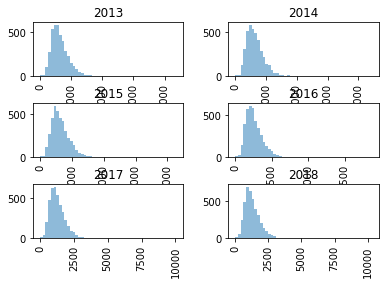

['Median Age']


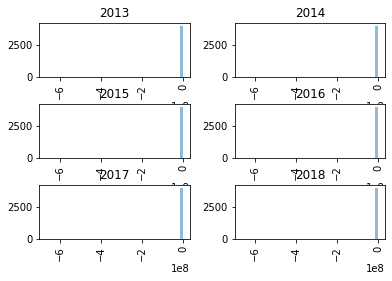

['Total White']


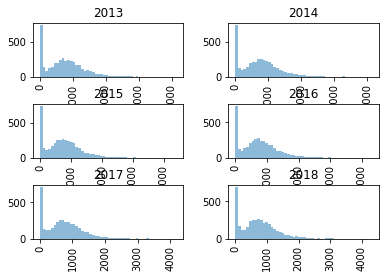

['Total Black']


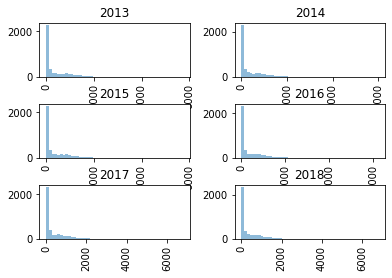

['Median HH Income']


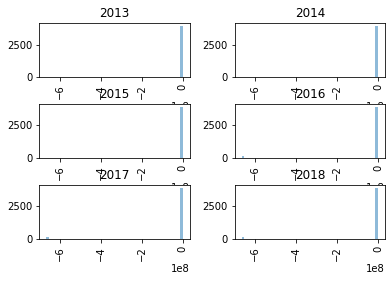

['Total Housing Units']


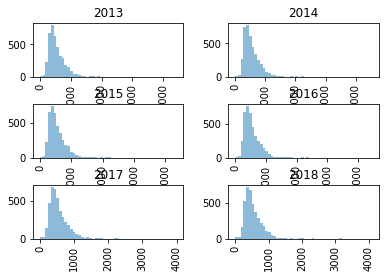

['Total Vacant Units']


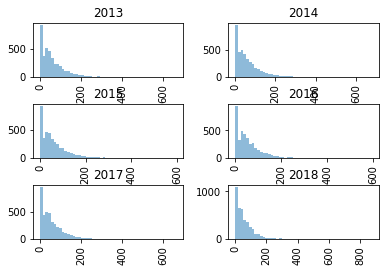

['Median Number of Rooms']


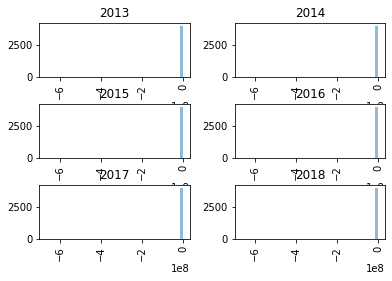

['Median Year Built']


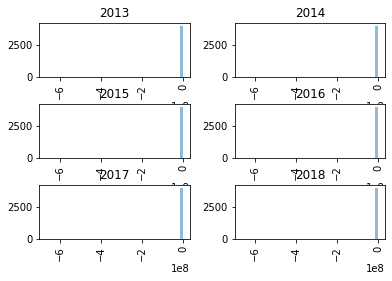

['Median Gross Rent']


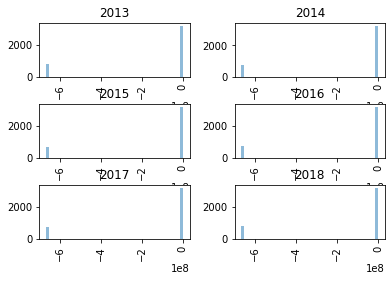

['Mean HH Size']


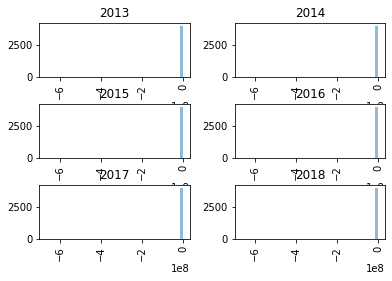

['HH with Children']


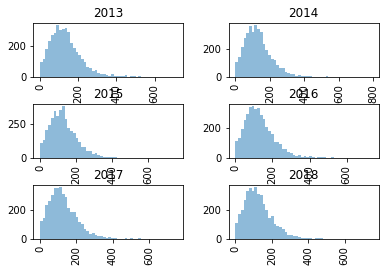

['Total HH']


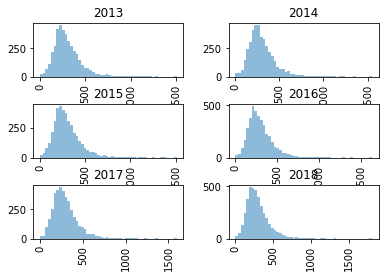

In [37]:
for f in [['Total Population'], ['Median Age'],
          ['Total White'], ['Total Black'],
          ['Median HH Income'], ['Total Housing Units'],
          ['Total Vacant Units'], ['Median Number of Rooms'],
          ['Median Year Built'], ['Median Gross Rent'],
          ['Mean HH Size'], ['HH with Children'],
          ['Total HH']]:
    print(f)
    df[f].hist(by=df['Year'], bins=50, alpha=0.5)
    plt.show()

In [38]:
df['Median Age'][df['Median Age'] < 0] = None
df['Median HH Income'][df['Median HH Income'] < 0] = None
df['Median Number of Rooms'][df['Median Number of Rooms'] < 0] = None
df['Median Year Built'][df['Median Year Built'] <= 0] = None
df['Median Gross Rent'][df['Median Gross Rent'] < 0] = None
df['Mean HH Size'][df['Mean HH Size'] < 0] = None

In [39]:
check_dataframe_datatypes(df)

DataFrame shape:  (23958, 15) 


Total Population is Numeric
       Total Population
count      23958.000000
mean        1309.225603
std          619.832893
min            0.000000
25%          888.000000
50%         1195.000000
75%         1607.750000
max        10317.000000
NA counts:  0



GEO_ID is Object with  3993  unique values
                       GEO_ID
1500000US170318060042       6
1500000US170312429001       6
1500000US170318081002       6
1500000US170314207005       6
1500000US170317404002       6
...                       ...
1500000US170318331001       6
1500000US170318282024       6
1500000US170318282011       6
1500000US170318050023       6
1500000US170312309003       6

[3993 rows x 1 columns]
NA counts:  0



Year is Numeric
               Year
count  23958.000000
mean    2015.500000
std        1.707861
min     2013.000000
25%     2014.000000
50%     2015.500000
75%     2017.000000
max     2018.000000
NA counts:  0



Median Age is Numeric
         Median Age
count 

['Total Population']


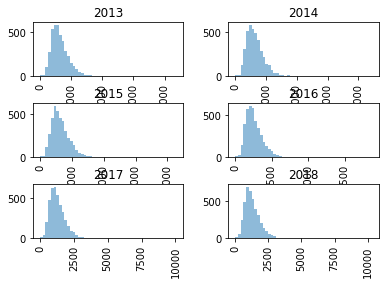

['Median Age']


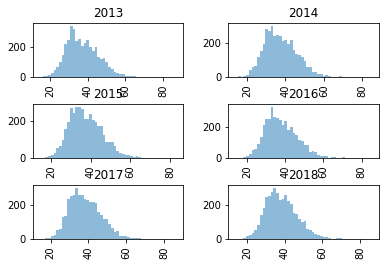

['Total White']


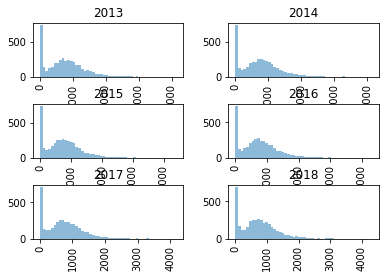

['Total Black']


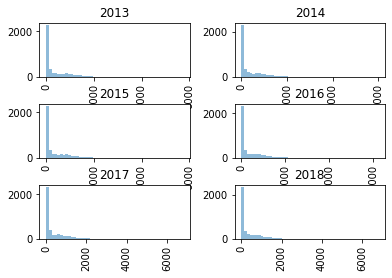

['Median HH Income']


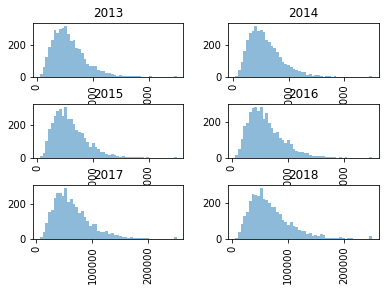

['Total Housing Units']


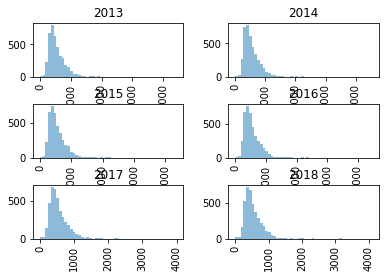

['Total Vacant Units']


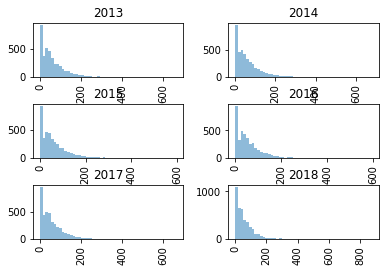

['Median Number of Rooms']


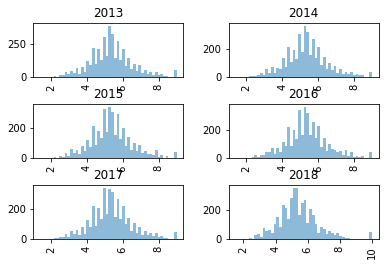

['Median Year Built']


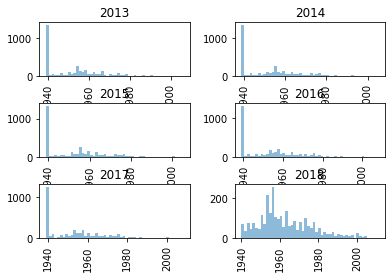

['Median Gross Rent']


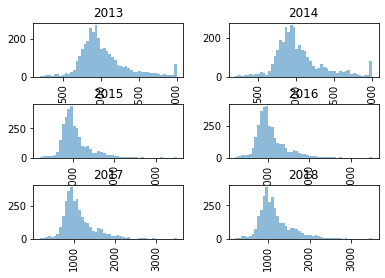

['Mean HH Size']


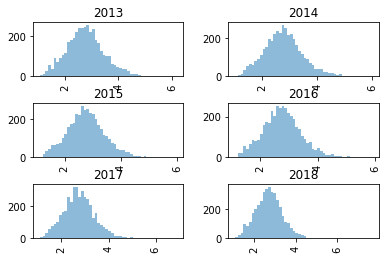

['HH with Children']


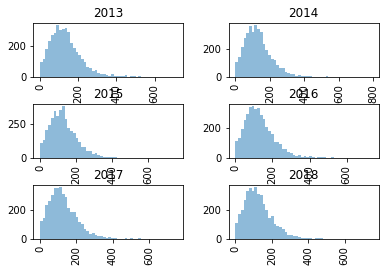

['Total HH']


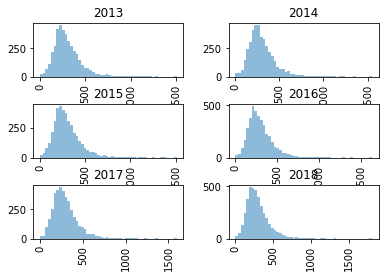

In [40]:
for f in [['Total Population'], ['Median Age'],
          ['Total White'], ['Total Black'],
          ['Median HH Income'], ['Total Housing Units'],
          ['Total Vacant Units'], ['Median Number of Rooms'],
          ['Median Year Built'], ['Median Gross Rent'],
          ['Mean HH Size'], ['HH with Children'],
          ['Total HH']]:
    print(f)
    df[f].hist(by=df['Year'], bins=50, alpha=0.5)
    plt.show()

In [41]:
df['Percent White'] = df['Total White']/df['Total Population']
df['Percent Black'] = df['Total Black']/df['Total Population']
df['Percent HH with Children'] = df['HH with Children']/df['Total HH']
df['Percent Housing Vacant'] = df['Total Vacant Units']/df['Total Housing Units']

In [42]:
df = df[['GEO_ID', 'Year', 'Total Population', 'Median Age', 
         'Median HH Income', 'Total Housing Units', 
         'Median Number of Rooms', 'Median Year Built',
         'Median Gross Rent', 'Mean HH Size',
         'Percent White', 'Percent Black', 
         'Percent HH with Children', 'Percent Housing Vacant']]
df["geo_12"] = df["GEO_ID"].map(lambda x: str(x)[-12:])

In [43]:
df.head()

,GEO_ID,Year,Total Population,Median Age,Median HH Income,Total Housing Units,Median Number of Rooms,Median Year Built,Median Gross Rent,Mean HH Size,Percent White,Percent Black,Percent HH with Children,Percent Housing Vacant,geo_12
0,1500000US170310302003,2013,1064,40.7,160893.0,450,7.3,1939.0,963.0,2.60,0.916353,0.000000,0.604348,0.088889,170310302003
1,1500000US170310302004,2013,1828,26.7,60568.0,711,5.1,1939.0,1150.0,2.54,0.818381,0.085339,0.638060,0.000000,170310302004
2,1500000US170310303001,2013,1306,36.1,28621.0,747,4.1,1945.0,868.0,2.04,0.556662,0.231240,0.665072,0.143240,170310303001
3,1500000US170310303002,2013,1625,35.7,38257.0,801,4.1,1943.0,838.0,2.22,0.700308,0.047385,0.524590,0.084894,170310303002
4,1500000US170310304001,2013,1450,36.0,26875.0,877,4.1,1961.0,732.0,1.85,0.693793,0.133793,0.427673,0.104903,170310304001


In [44]:
schools_12 = gpd.read_file("https://data.cityofchicago.org/resource/anck-gptm.geojson?$limit=9999999")
schools_12['Year'] = 2012
schools_13 = gpd.read_file("https://data.cityofchicago.org/resource/98wb-ks45.geojson?$limit=9999999")
schools_13['Year'] = 2013
schools_14 = gpd.read_file("https://data.cityofchicago.org/resource/dgq3-i7xm.geojson?$limit=9999999")
schools_14['Year'] = 2014
schools_15 = gpd.read_file("https://data.cityofchicago.org/resource/mntu-576c.geojson?$limit=9999999")
schools_15['Year'] = 2015
schools_16 = gpd.read_file("https://data.cityofchicago.org/resource/mb74-gx3g.geojson?$limit=9999999")
schools_16['Year'] = 2016
schools_17 = gpd.read_file("https://data.cityofchicago.org/resource/75e5-35kf.geojson?$limit=9999999")
schools_17['Year'] = 2017
schools_18 = gpd.read_file("https://data.cityofchicago.org/resource/d2h8-2upd.geojson?$limit=9999999")
schools_18['Year'] = 2018


In [45]:
schools = schools_12.append(schools_13)
schools = schools.append(schools_14)
schools = schools.append(schools_15)
schools = schools.append(schools_16)
schools = schools.append(schools_17)
schools = schools.append(schools_18)
schools.shape

(4717, 22)

In [46]:
chicago_gdf = gpd.read_file("https://data.cityofchicago.org/resource/bt9m-d2mf.geojson?$limit=9999999")
chicago_gdf["geo_12"] = chicago_gdf["geoid10"].map(lambda x: str(x)[:12])

In [47]:
schools_gdf = gpd.sjoin(chicago_gdf, schools, how="left", op='intersects')

In [48]:
schools_gdf.head()

,statefp10,name10,blockce10,tract_bloc,geoid10,tractce10,countyfp10,geometry,geo_12,index_right,...,governance,ald_15,long,commarea,short_name,ward_15,address,geo_network,lat,phone
0,17,Block 2010,2010,6903002010,170316903002010,690300,031,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ...",170316903002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,Block 3007,3007,6809003007,170316809003007,680900,031,"MULTIPOLYGON (((-87.63412 41.77447, -87.63410 ...",170316809003,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,Block 3013,3013,6809003013,170316809003013,680900,031,"MULTIPOLYGON (((-87.63485 41.77263, -87.63522 ...",170316809003,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,Block 4019,4019,2909004019,170312909004019,290900,031,"MULTIPOLYGON (((-87.73841 41.85913, -87.73842 ...",170312909004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,Block 4016,4016,2925004016,170312925004016,292500,031,"MULTIPOLYGON (((-87.73217 41.85476, -87.73226 ...",170312925004,248.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
schools_geo12 = schools_gdf[['Year', 'geo_12', 'school_id']].groupby(['Year', 'geo_12']).count().reset_index().rename(columns = {'school_id': 'Number of Public Schools'})

In [50]:
df = df.merge(schools_geo12, on=["geo_12", "Year"], how='outer')

In [51]:
df['Number of Public Schools'][df['Number of Public Schools'].isna()] = 0

In [52]:
df.head()

,GEO_ID,Year,Total Population,Median Age,Median HH Income,Total Housing Units,Median Number of Rooms,Median Year Built,Median Gross Rent,Mean HH Size,Percent White,Percent Black,Percent HH with Children,Percent Housing Vacant,geo_12,Number of Public Schools
0,1500000US170310302003,2013,1064.0,40.7,160893.0,450.0,7.3,1939.0,963.0,2.60,0.916353,0.000000,0.604348,0.088889,170310302003,0.0
1,1500000US170310302004,2013,1828.0,26.7,60568.0,711.0,5.1,1939.0,1150.0,2.54,0.818381,0.085339,0.638060,0.000000,170310302004,1.0
2,1500000US170310303001,2013,1306.0,36.1,28621.0,747.0,4.1,1945.0,868.0,2.04,0.556662,0.231240,0.665072,0.143240,170310303001,0.0
3,1500000US170310303002,2013,1625.0,35.7,38257.0,801.0,4.1,1943.0,838.0,2.22,0.700308,0.047385,0.524590,0.084894,170310303002,0.0
4,1500000US170310304001,2013,1450.0,36.0,26875.0,877.0,4.1,1961.0,732.0,1.85,0.693793,0.133793,0.427673,0.104903,170310304001,0.0


In [53]:
df['Year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2012])

In [54]:
df.to_csv('data/Census data.csv', index=False)